Задание 10. Сеточные методы для решения уравнения теплопроводности

In [58]:
! pip install numpy
! pip install matplotlib
! pip install scipy

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [60]:
def get_conditions_for_solution(solution, x_edge, kappa):
    dudt = lambda x0, t0: derivative(lambda t: solution(x0, t), t0)
    du2dxdx = lambda x0, t0: derivative(lambda x: solution(x, t0), x0, n=2)
    mu = lambda x: solution(x, 0)
    mu1 = lambda t: solution(0, t)
    mu2 = lambda t: solution(x_edge, t)
    f = lambda x, t: dudt(x, t) - kappa * du2dxdx(x, t)
    return f, mu, mu1, mu2

Реализация с помощью явной схемы (вес равен 0)

In [61]:
def explicit(f, mu, mu1, mu2, x_edge, t_edge, n, m, kappa):
    h = x_edge / n
    t = t_edge / m
    x_grid = np.array([h * i for i in range(n + 1)])
    t_grid = np.array([t * i for i in range(m + 1)])
    u_grid = []
    for i in range(n + 1):
        u_grid.append([ 0. ] * (m + 1))
        u_grid[i][0] = mu(x_grid[i])
    for k in range(1, m + 1):
        for i in range(1, n):
            f_val = f(x_grid[i], t_grid[k - 1])
            diff = u_grid[i - 1][k - 1] - 2 * u_grid[i][k - 1] + u_grid[i + 1][k - 1]
            u_grid[i][k] = u_grid[i][k-1] + t * (diff * kappa / h ** 2 + f_val)
        u_grid[0][k] = mu1(t_grid[k])
        u_grid[n][k] = mu2(t_grid[k])
    return x_grid, t_grid, np.array(u_grid)

Реализация с помощью неявной схемы (вес равен 1)

In [62]:
def implicit(f, mu, mu1, mu2, x_edge, t_edge, n, m, kappa):
    h = x_edge / n
    t = t_edge / m
    x_grid = np.array([h * i for i in range(n + 1)])
    t_grid = np.array([t * i for i in range(m + 1)])
    u_grid = []
    for i in range(n + 1):
        u_grid.append([ 0. ] * (m + 1))
        u_grid[i][0] = mu(x_grid[i])
    a = [ 0. ] * (n + 1)
    b = [ 1. ] * (n + 1)
    c = [ 0. ] * (n + 1)
    g = [ 0. ] * (n + 1)
    for k in range(1, m + 1):
        g[0] = mu1(t_grid[k])
        g[n] = mu2(t_grid[k])
        for i in range(1, n):
            a[i] = kappa / h ** 2
            b[i] = -2 * kappa / h ** 2 - 1 / t
            c[i] = kappa / h ** 2
            g[i] = - u_grid[i][k - 1] / t - f(x_grid[i], t_grid[k])
        # Решение СЛАУ методом прогонки
        scoef = [ 0. ] * (n + 1)
        tcoef = [ 0. ] * (n + 1)
        scoef[0] = -c[0] / b[0]
        tcoef[0] = g[0] / b[0]
        for i in range(1, n + 1):
            scoef[i] = -c[i] / (a[i] * scoef[i - 1] + b[i])
            tcoef[i] = (g[i] - a[i] * tcoef[i - 1]) / (a[i] * scoef[i - 1] + b[i])
        u_grid[n][k] = tcoef[n]
        for i in range(n - 1, -1, -1):
            u_grid[i][k] = scoef[i] * u_grid[i + 1][k] + tcoef[i]
    return x_grid, t_grid, np.array(u_grid)


Тестирование решения с помощью явной схемы

Условие устойчивости выполняется: True


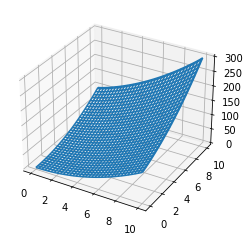

In [74]:
solution = lambda x, t: x * t + x ** 2 + t ** 2
KAPPA = 0.01
X = 10
T = 10
N = 100
M = 100
print("Условие устойчивости выполняется:", 2 * KAPPA * T / M <= (X / N) ** 2)
f, mu, mu1, mu2 = get_conditions_for_solution(solution, X, KAPPA)
x, t, u = explicit(f, mu, mu1, mu2, X, T, N, M, KAPPA)
x, t = np.meshgrid(x, t, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, t, u)
plt.show()

Условие устойчивости выполняется: False


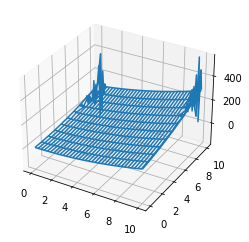

In [80]:
M = 10
print("Условие устойчивости выполняется:", 2 * KAPPA * T / M <= (X / N) ** 2)
f, mu, mu1, mu2 = get_conditions_for_solution(solution, X, KAPPA)
x, t, u = explicit(f, mu, mu1, mu2, X, T, N, M, KAPPA)
x, t = np.meshgrid(x, t, indexing='ij')
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_wireframe(x, t, u)
plt.show()

Тестирование решения с помощью неявной схемы

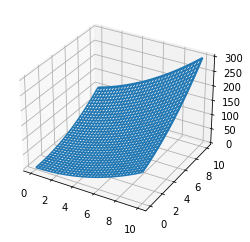

In [65]:
KAPPA = 0.001
X = 10
T = 10
N = 100
M = 100
f, mu, mu1, mu2 = get_conditions_for_solution(solution, X, KAPPA)
x, t, u = implicit(f, mu, mu1, mu2, X, T, N, M, KAPPA)
x, t = np.meshgrid(x, t, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, t, u)
plt.show()

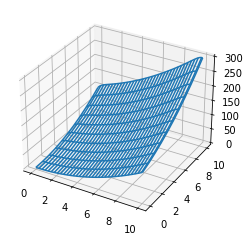

In [81]:
M = 10
f, mu, mu1, mu2 = get_conditions_for_solution(solution, X, KAPPA)
x, t, u = implicit(f, mu, mu1, mu2, X, T, N, M, KAPPA)
x, t = np.meshgrid(x, t, indexing='ij')
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_wireframe(x, t, u)
plt.show()